In [1]:
try:
    import jax
except:
    %pip install -qq jax jaxlib
    import jax

import jax.numpy as jnp
from typing import Any, Callable, Sequence, Optional
from jax import lax, random, numpy as jnp
from jax.nn import initializers
import tensorflow as tf

try:
    import flax
except:
    %pip install -qq git+https://github.com/google/flax.git
    import flax

from flax.core import freeze, unfreeze
from flax import linen as nn

try:
    import matplotlib.pyplot as plt
except:
    %pip install -qq matplotlib
    import matplotlib.pyplot as plt
    
try:
    from probml_utils import savefig, latexify
except:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

import seaborn as sns

In [2]:
latexify(width_scale_factor=2)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [3]:
class MLP(nn.Module):
  features: Sequence[int]
  alpha: Sequence[int]
  beta: Sequence[int]
  
  @nn.compact
  def __call__(self, inputs):
    x = inputs
    x = nn.Dense(self.features[0],kernel_init=jax.nn.initializers.normal(self.alpha[0]),bias_init=jax.nn.initializers.normal(self.beta[0]))(x)
    x = nn.tanh(x)
    x = nn.Dense(self.features[1],kernel_init=jax.nn.initializers.normal(self.alpha[1]),bias_init=jax.nn.initializers.normal(self.beta[1]))(x)
    return x



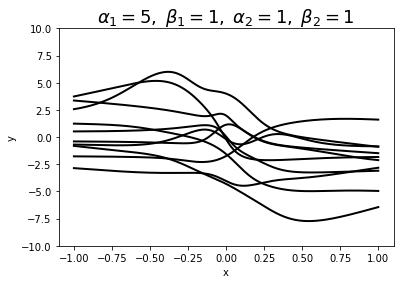

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


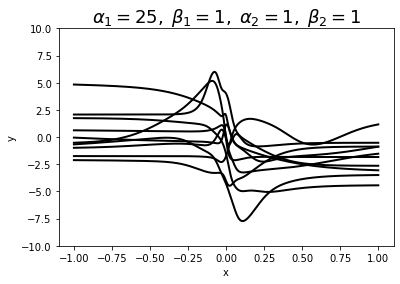

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


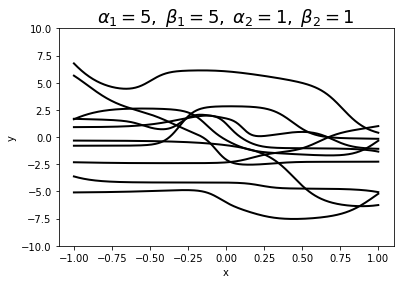

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


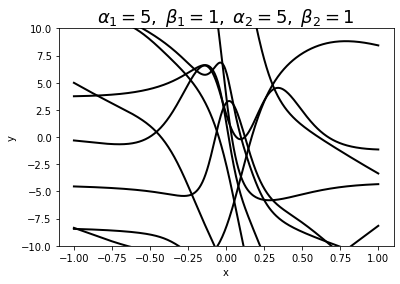

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


In [4]:
def mlp_output(parameters,save_name):
    nsample=10  
    for i in range(nsample):
      key = random.PRNGKey(i)
      model = MLP(parameters['features'],parameters['alpha'],parameters['beta'])
      params = model.init(key,x)
      y = model.apply(params, x)

      plt.plot(x, y, color='k', lw=2)
      plt.ylim([-10, 10])
      plt.xlabel('x')
      plt.ylabel('y')
      ttl = r'$\alpha_1 = {},\; \beta_1 = {},\; \alpha_2 = {},\; \beta_2 = {}$'.format(
          parameters['alpha'][0],parameters['beta'][0], parameters['alpha'][1],parameters['beta'][1])
      plt.title(ttl, fontsize=18)

    plt.show()  
    if len(save_name) > 0:
        savefig("/images",save_name)




ntrials = 4
x = jnp.arange(-1, 1.005, 0.005).reshape(-1,1)
nsample = 10

nhidden = 12
nout = 1
features=[nhidden,nout]
a=[[5,1],[25,1],[5,1],[5,5]]
b=[[1,1],[1,1],[5,1],[1,1]]

parameters={'alpha':[5,1],'beta':[1,1],'features':features}
mlp_output(parameters,"image1.pdf")

parameters={'alpha':[25,1],'beta':[1,1],'features':features}
mlp_output(parameters,"image1.pdf")

parameters={'alpha':[5,1],'beta':[5,1],'features':features}
mlp_output(parameters,"image1.pdf")

parameters={'alpha':[5,5],'beta':[1,1],'features':features}
mlp_output(parameters,"image1.pdf")



In [5]:
from ipywidgets import interact


@interact(alpha1=(1,25),beta1=(1,25),alpha2=(1,25),beta2=(1,25))
def animate_gp_regression(alpha1=1,beta1=1,alpha2=1,beta2=1):
    parameters={'alpha':[alpha1,alpha2],'beta':[beta1,beta2],'features':features}
    mlp_output(parameters,"")

interactive(children=(IntSlider(value=1, description='alpha1', max=25, min=1), IntSlider(value=1, description=…